In [33]:
# use Python3
import pandas as pd
df = pd.read_pickle('BTC-USD-60.pkl')

In [34]:
# use daily prices
df['date'] = pd.to_datetime(df['time'],unit='s').dt.date
group = df.groupby('date')
Daily_Close_Price = group['close'].mean()

Daily_Close_Price=Daily_Close_Price.reset_index()
Daily_Close_Price=Daily_Close_Price.set_index('date')

Daily_Close_Price.head()
#Daily_Close_Price.shape (824, 1)

,close
date,
2016-01-01,433.300405
2016-01-02,435.083883
2016-01-03,431.338427
2016-01-04,433.626442
2016-01-05,433.373114


In [35]:
Daily_Avg_Volume = group['volume'].mean()

Daily_Avg_Volume=Daily_Avg_Volume.reset_index()
Daily_Avg_Volume=Daily_Avg_Volume.set_index('date')

Daily_Avg_Volume.head()

,volume
date,
2016-01-01,3.011128
2016-01-02,2.514743
2016-01-03,2.911503
2016-01-04,4.324612
2016-01-05,3.772930


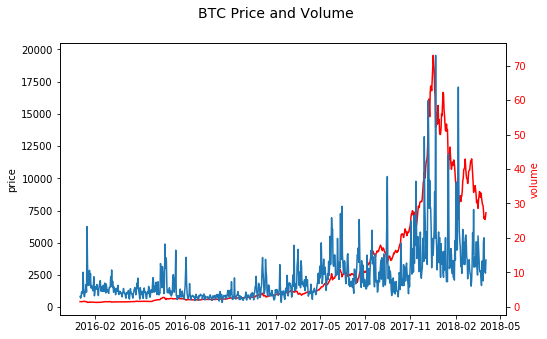

In [36]:
import matplotlib.pyplot as plt
#plt.plot(Daily_Close_Price['close'])
#plt.plot(Daily_Avg_Volume['volume'])

fig = plt.figure(figsize=(8,5))
fig.suptitle('BTC Price and Volume', fontsize=14)
ax1 = fig.add_subplot(111)
ax1.plot(Daily_Close_Price['close'], 'r-')
ax1.set_ylabel('price')

ax2 = ax1.twinx()
ax2.plot(Daily_Avg_Volume['volume'])
ax2.set_ylabel('volume', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

In [37]:
# correlation
Daily_Close_Price['close'].corr(Daily_Avg_Volume['volume'])

0.6211698568707335